## Analyzing generated dataset

### Import data

In [69]:
import os
import sys
project_root = os.path.dirname(os.path.abspath(''))
sys.path.insert(0, project_root)
sys.path.insert(0, os.path.join(project_root, 'model'))
sys.path.insert(0, os.path.join(project_root, 'dataset_generation'))

from importlib import reload
import analysis_util
import util
reload(analysis_util)
reload(util)

from analysis_util import analyze_outliers, plot_value_distributions, analyze_sequences, analyze_syntax_tokens, plot_values
from util import load_dataset, create_dataloader
import pandas as pd
import numpy as np
import torch

In [70]:
datapath = '/Users/luis/Desktop/Cranmer 2024/Workplace/smallMutations/similar-expressions/data'
syntax, consts, val_x, val, syntax_cats = load_dataset(datapath, 'dataset_240822_1')

def value_transform(x):
    return torch.arcsinh(x)/10  # Example transformation

val_transformed = value_transform(torch.tensor(val)).detach().numpy()

### Analyze dataset

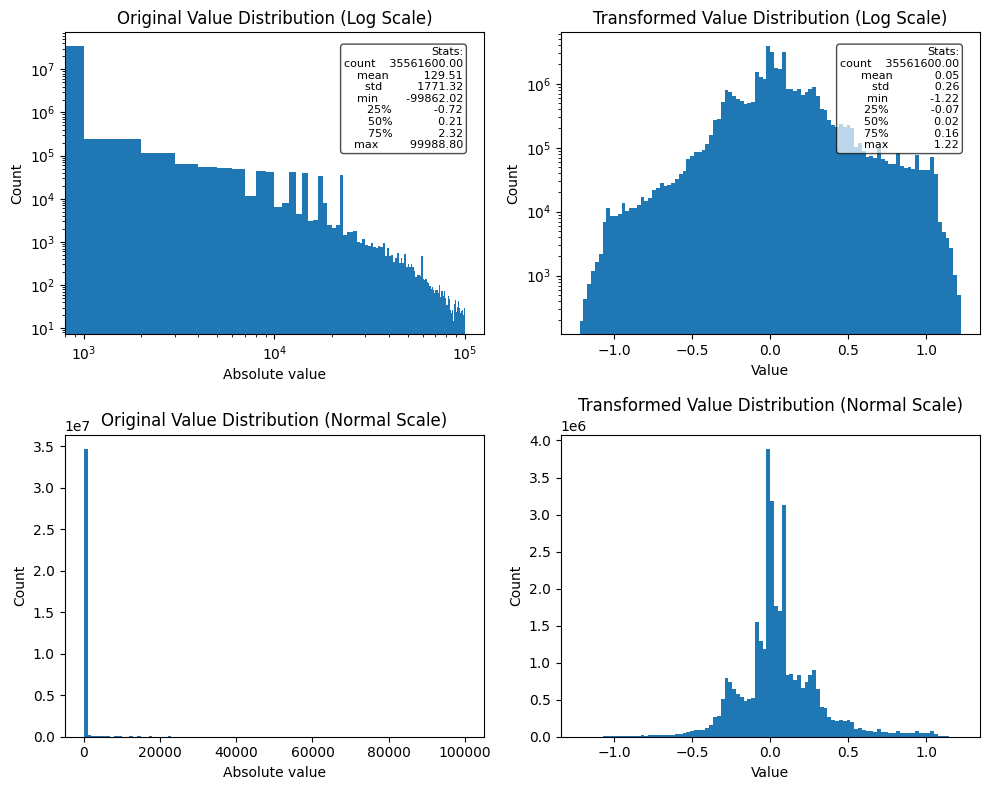

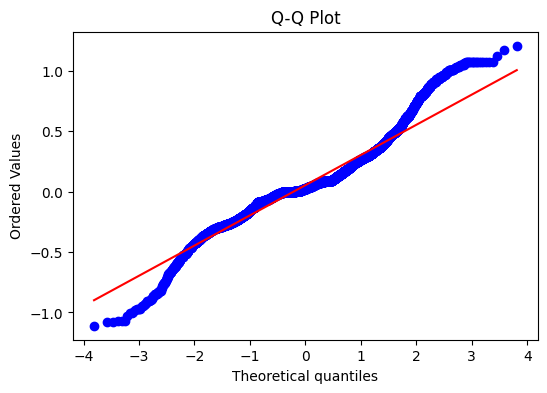

Number of outliers detected using z-score method: 778679
Number of outliers detected using IQR method: 2726715


In [66]:
plot_value_distributions(val, val_transformed)
analyze_outliers(val_transformed)

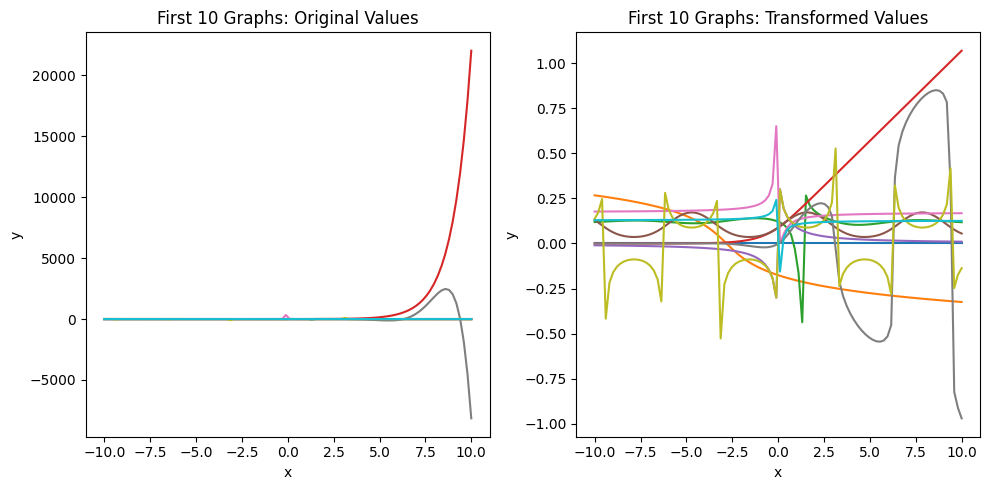

In [74]:
plot_values(val_x, val, val_transformed, idx=np.arange(10))

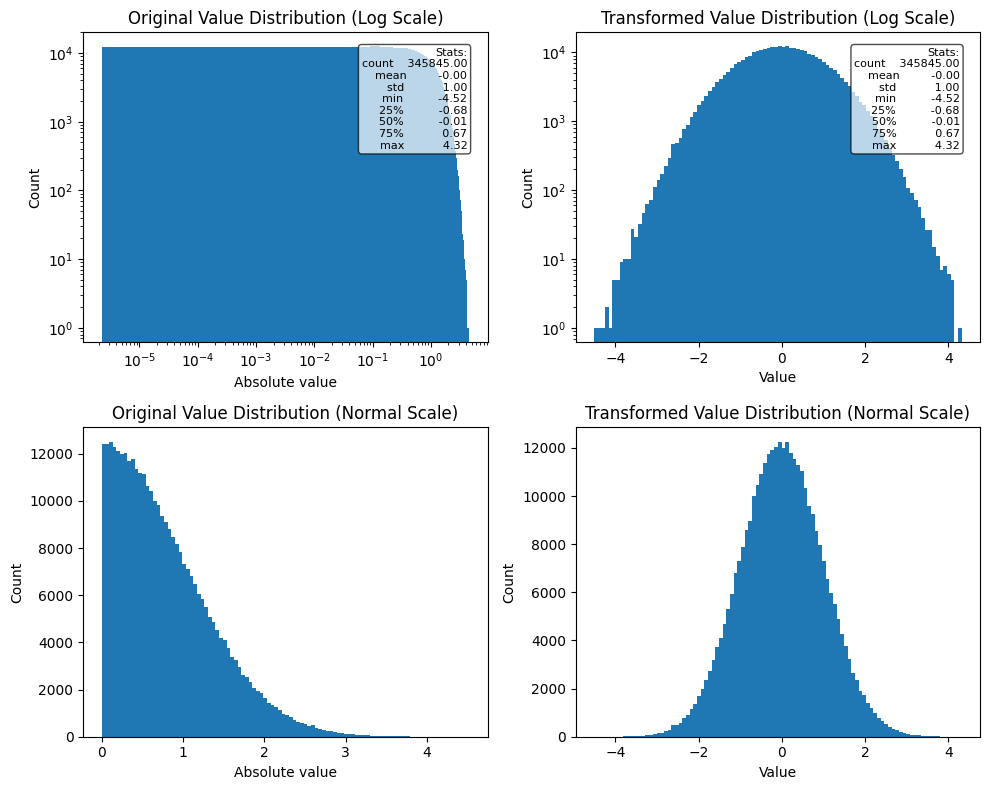

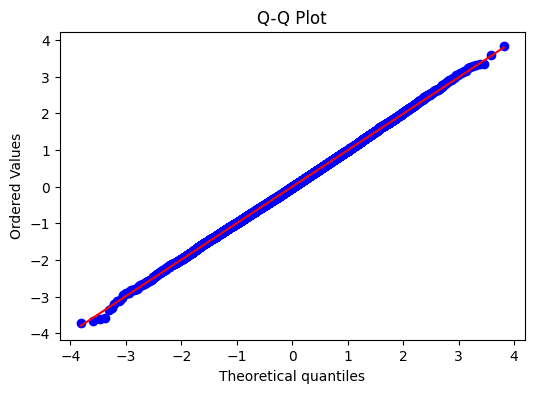

Number of outliers detected using z-score method: 930
Number of outliers detected using IQR method: 2388


In [75]:
mask = (syntax[:, :, syntax_cats.index('CON')] == 1)
active_consts = consts[mask]

plot_value_distributions(active_consts, active_consts)
analyze_outliers(active_consts)

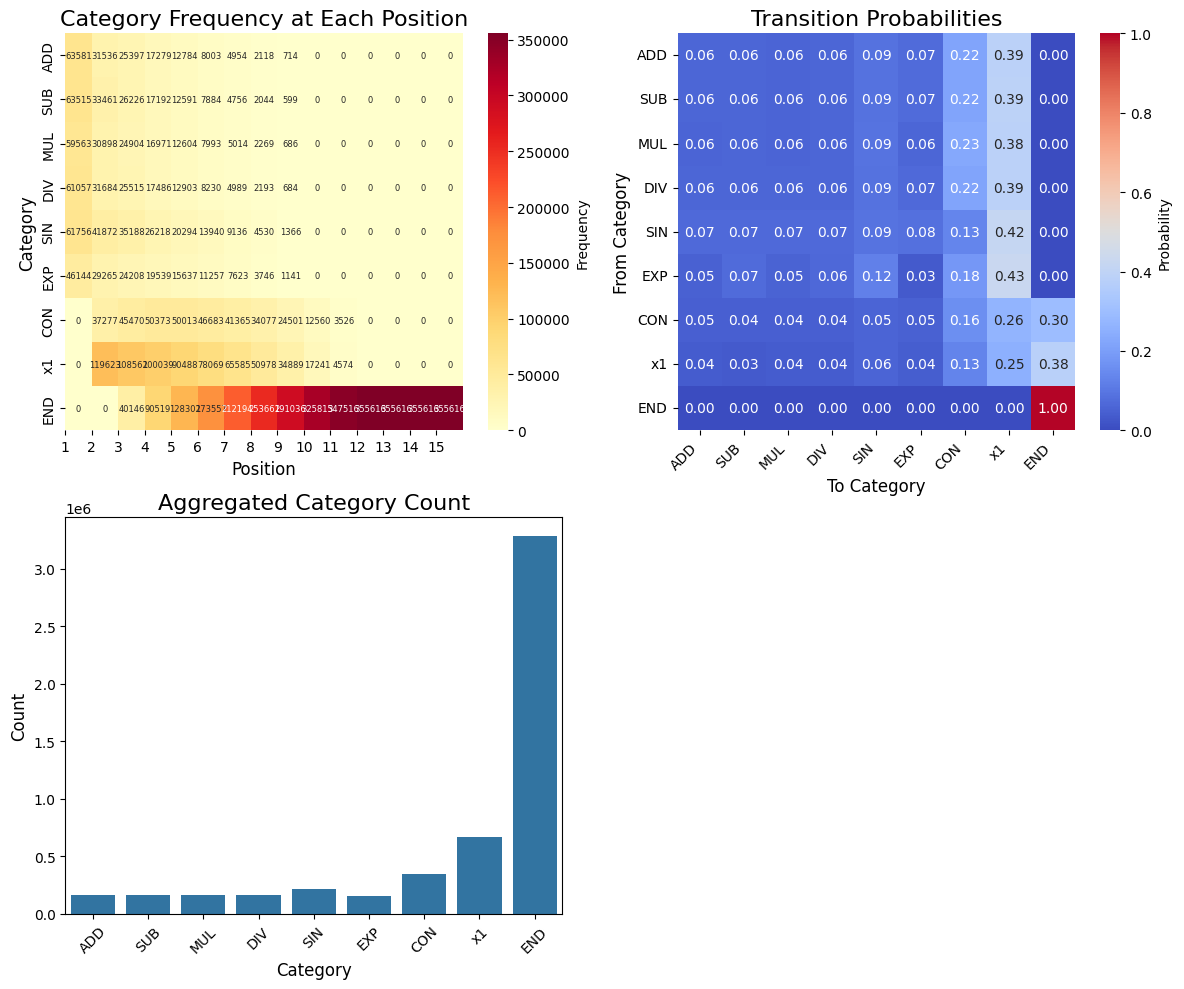

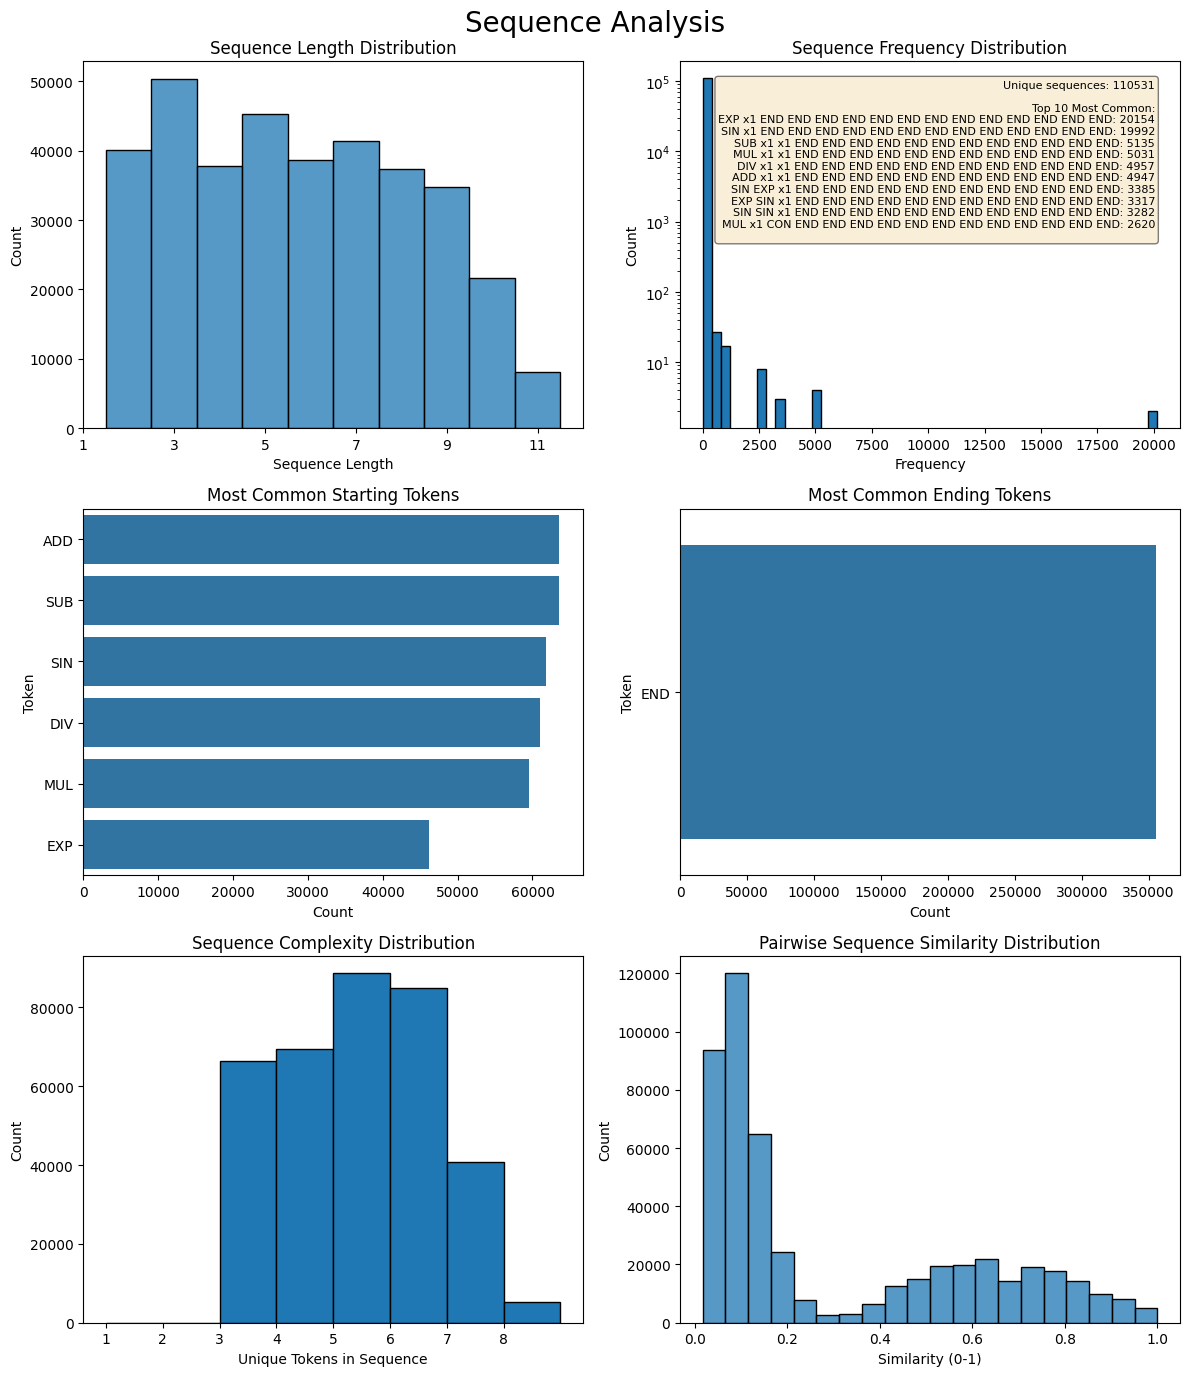

In [76]:
analyze_syntax_tokens(syntax, syntax_cats)
analyze_sequences(syntax, syntax_cats)